In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import sys
from xgboost import XGBClassifier
from pandas.plotting import scatter_matrix

print('Done')

Done


In [85]:
# SMALL INTRODUCTION MATERIALS

# visualization of the ship evacuation process: https://www.youtube.com/watch?v=03IAn3TXVOc
# Titanic Deckplans: https://www.encyclopedia-titanica.org/titanic-deckplans/


In [86]:
# Gathering train and test data
train_data = pd.read_csv("input/train.csv")
test_data = pd.read_csv("input/test.csv")
train = train_data.copy()
test = test_data.copy()

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)
pred = train_data['Survived']

train.head(5)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:

# EXPLORING THE DATA & PLAN PREPROCESSING


In [89]:
# So, in training data we have 891 records with 12 columns.
# 5 of them consist text data

# # Looking at missing data
# a lot of missing data in column Cabin, also some missing in Age
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [90]:
# for the test data we can see that there is less missing data than in train data
# but also we have only 418 records and 11 cols (no 'Survival')
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

# 1. Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

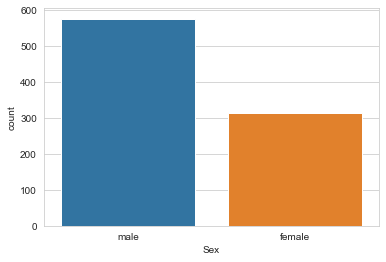

In [91]:
sns.countplot(x="Sex", data=train_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

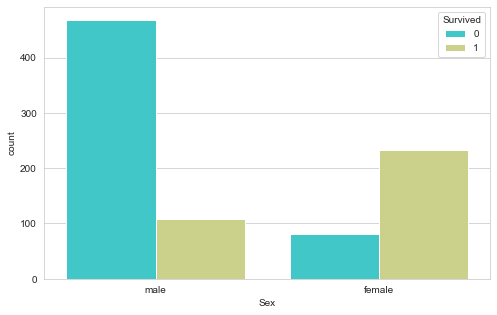

In [92]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'Sex',hue='Survived',data=train_data, palette='rainbow')

In [93]:
sex1 = pd.get_dummies(train['Sex'])
sex2 = pd.get_dummies(test['Sex'])

train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

train = pd.concat([train,sex1],axis=1)
test = pd.concat([test,sex2],axis=1)

train.drop(['female'],axis=1,inplace=True)
test.drop(['female'],axis=1,inplace=True)


In [94]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


2. Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

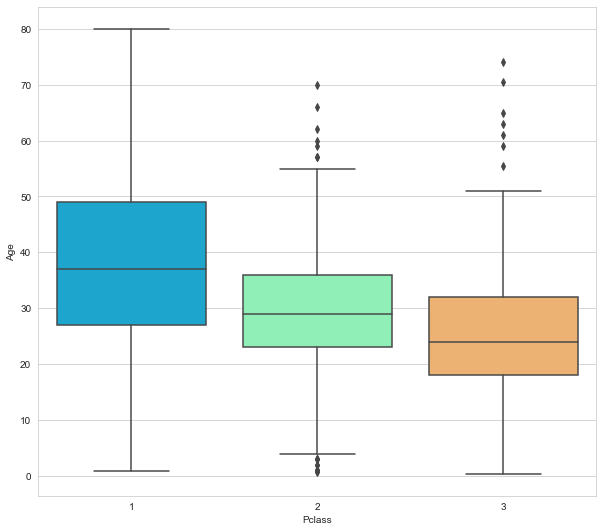

In [95]:
plt.figure(figsize=(10, 9))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='rainbow')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

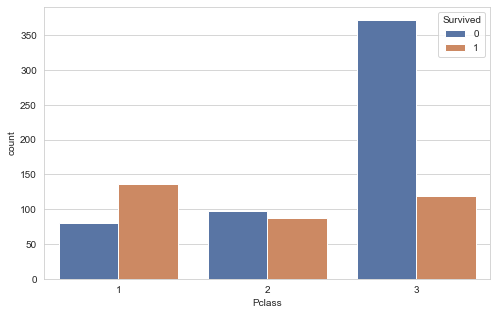

In [96]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Pclass',hue='Survived',data=train_data,palette='deep')

3. Age

Text(0, 0.5, 'Density')

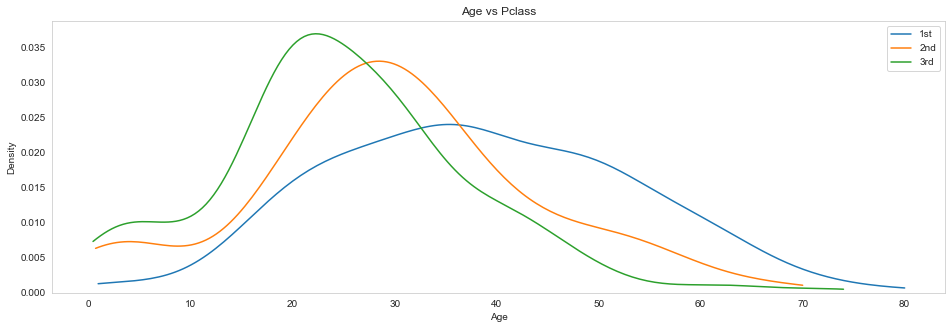

In [97]:
plt.figure(figsize=(16, 5))
for x in [1,2,3]:    ## for 3 classes
    sns.kdeplot(data=train_data.Age[train_data.Pclass == x],cut = 0, clip=(0,200)).grid(False)

plt.title("Age vs Pclass")
plt.legend(("1st","2nd","3rd"))
plt.xlabel("Age")
plt.ylabel("Density")

In [98]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [99]:
train["Age"].fillna(train['Age'].describe().loc[['50%']][0], inplace = True)
test["Age"].fillna(test['Age'].describe().loc[['50%']][0], inplace = True)
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
male          0
dtype: int64

4. Fare

/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare distribution for all the people')

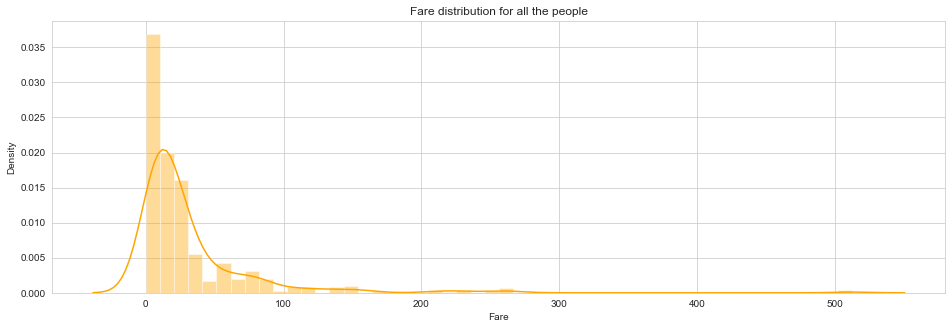

In [100]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train_data["Fare"], color="orange",ax = axes)
plt.title("Fare distribution for all the people")

/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


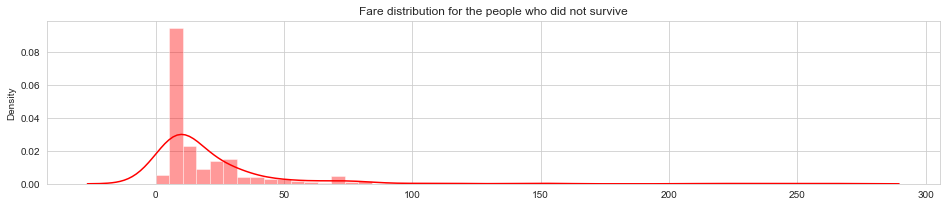

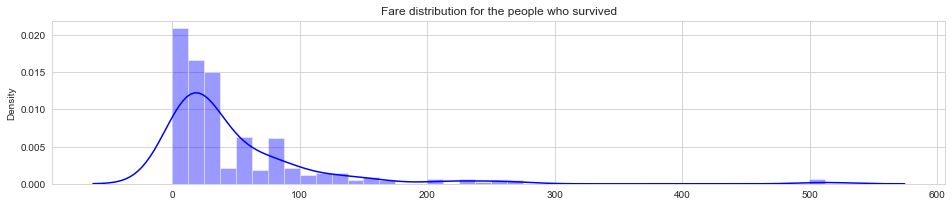

In [101]:
Fare_0 = []
Fare_1 = []
for i in range(0,891):
    if train_data["Survived"][i] == 0:
        Fare_0.append(train["Fare"][i])
    else:
        Fare_1.append(train["Fare"][i])

f, axes = plt.subplots(1,1, figsize = (16, 3))
g1 = sns.distplot(Fare_0, color="red",ax = axes)
plt.title("Fare distribution for the people who did not survive")

f, axes = plt.subplots(1,1, figsize = (16, 3))
g1 = sns.distplot(Fare_1, color="blue",ax = axes)
plt.title("Fare distribution for the people who survived")

plt.show()

test["Fare"].fillna(test['Fare'].describe().loc[['50%']][0], inplace = True)


5. Embarked¶

<AxesSubplot:xlabel='Embarked', ylabel='count'>

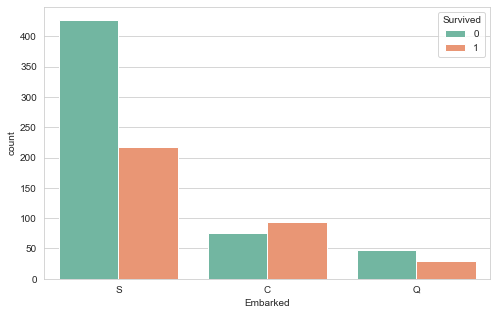

In [102]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked',hue='Survived',data=train_data, palette = "Set2" )

In [103]:
train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

In [104]:
embark1 = pd.get_dummies(train['Embarked'])
embark2 = pd.get_dummies(test['Embarked'])

train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)

train = pd.concat([train,embark1],axis=1)
test = pd.concat([test,embark2],axis=1)


6. SibSp and Parch¶

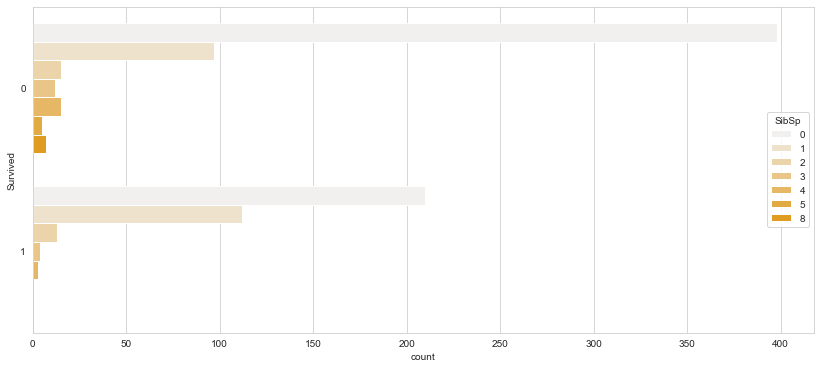

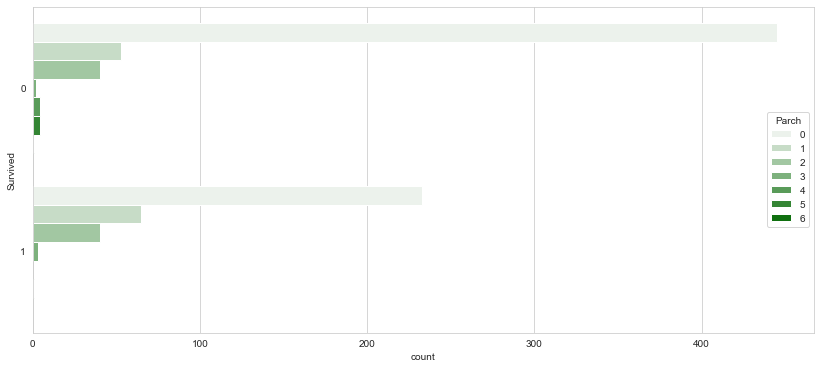

In [105]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(y="Survived", hue="SibSp", data=train ,color = "Orange" )

plt.figure(figsize=(14, 6))
ax = sns.countplot(y="Survived", hue="Parch", data=train , color = "Green" )

plt.show()

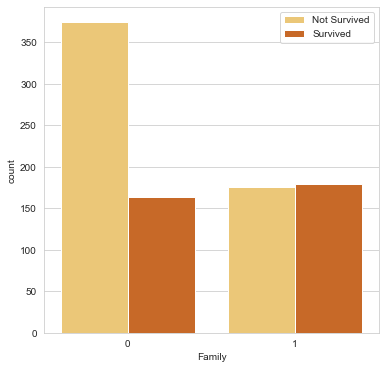

In [106]:
def fam(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 1
    else:
        return 0

train['Family'] = train.apply(fam, axis = 1)
test['Family'] = test.apply(fam, axis = 1)

train = train.drop(['SibSp','Parch'],axis=1)
test = test.drop(['SibSp','Parch'],axis=1)

plt.figure(figsize=(6, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'Family',hue='Survived',data=train, palette="YlOrBr" )
plt.legend(("Not Survived","Survived"))


7. Cabin¶

<Figure size 576x360 with 0 Axes>

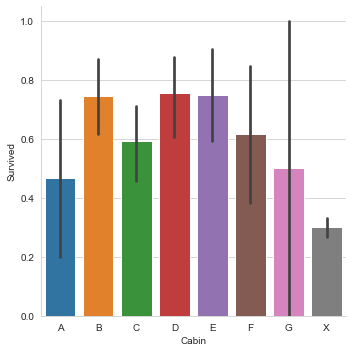

In [107]:
train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ])
test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin'] ])

plt.figure(figsize=(8, 5))
g = sns.catplot(y="Survived",x="Cabin",data=train,kind="bar",order=['A','B','C','D','E','F','G','X'])

In [108]:
train["Cabin"] = train["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
train["Cabin"] = train["Cabin"].astype(int)
test["Cabin"] = test["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
test["Cabin"] = test["Cabin"].astype(int)


8. Name & Titles

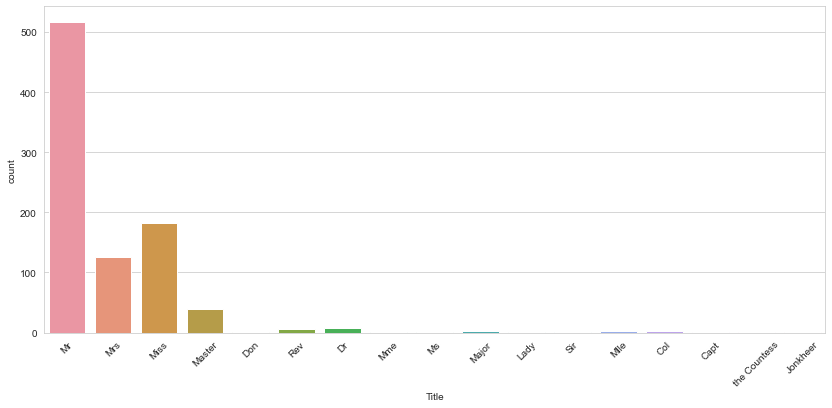

In [109]:
train_title = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(train_title)
test_title = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(test_title)

train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)



plt.figure(figsize=(14, 6))
g = sns.countplot(x="Title",data=train)
g = plt.setp(g.get_xticklabels(), rotation=45)


In [110]:
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train["Title"] = train["Title"].astype(int)
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test["Title"] = test["Title"].astype(int)


9. Ticket

In [111]:


Ticket1 = []
for i in list(train.Ticket):
    if not i.isdigit() :
        Ticket1.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket1.append("X")
train["Ticket"] = Ticket1

Ticket2 = []
for j in list(test.Ticket):
    if not j.isdigit() :
        Ticket2.append(j.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket2.append("X")
test["Ticket"] = Ticket2

train["Ticket"].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [112]:
test["Ticket"].unique()

array(['X', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3'], dtype=object)

In [113]:


np.union1d(train["Ticket"], test["Ticket"])


array(['A', 'A4', 'A5', 'AQ3', 'AQ4', 'AS', 'C', 'CA', 'CASOTON', 'FC',
       'FCC', 'Fa', 'LINE', 'LP', 'PC', 'PP', 'PPP', 'SC', 'SCA3', 'SCA4',
       'SCAH', 'SCOW', 'SCPARIS', 'SCParis', 'SOC', 'SOP', 'SOPP',
       'SOTONO2', 'SOTONOQ', 'SP', 'STONO', 'STONO2', 'STONOQ', 'SWPP',
       'WC', 'WEP', 'X'], dtype=object)

In [114]:
train= pd.get_dummies(train, columns = ["Ticket"], prefix="T")
test = pd.get_dummies(test, columns = ["Ticket"], prefix="T")



train = train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'],axis = 1)
test = test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1)

train.drop(['Survived'],axis=1,inplace=True)



train.head(5)



,Pclass,Age,Fare,Cabin,male,C,Q,S,Family,Title,...,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X
0,3,22.0,7.2500,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,3,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,35.0,53.1000,3,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1


In [115]:
print(train.isnull().sum())
print("Number of columns are :",train.isnull().sum().count())

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
Q            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are : 32


In [116]:


print(test.isnull().sum())
print("Number of columns are :",test.isnull().sum().count())


Pclass       0
Age          0
Fare         1
Cabin        0
male         0
C            0
Q            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are : 32


In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train2 = sc.fit_transform(train)
test2 = sc.transform(test)


Model Training

In [118]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

def get_scores(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    # number of correct predictions
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {
        'data_count': len(y_test),
        'accuracy': acc,
        'precision': prec,
        'recall': recall,
        'accuracy_count': num_acc
    }


KFold_Score = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression',
               'RandomForestClassifier', 'AdaBoostClassifier',
               'XGBoostClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          xgb.XGBClassifier(n_estimators=100),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
          ]
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = (cross_val_score(model, train, np.ravel(pred), scoring = 'accuracy', cv=cv))
    j = j+1



mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.837989,0.848315,0.842697,0.842697,0.820225,0.838384
GradientBoostingClassifier,0.843575,0.814607,0.825843,0.825843,0.803371,0.822648
XGBoostClassifier,0.837989,0.808989,0.842697,0.814607,0.786517,0.818160
LogisticRegression,0.810056,0.786517,0.814607,0.808989,0.825843,0.809202
AdaBoostClassifier,0.810056,0.792135,0.780899,0.786517,0.814607,0.796843
Linear SVM,0.787709,0.769663,0.792135,0.786517,0.803371,0.787879
KNeighborsClassifier,0.720670,0.713483,0.702247,0.685393,0.679775,0.700314
Radial SVM,0.709497,0.640449,0.719101,0.685393,0.606742,0.672237



Hyperparameter Tuning

In [127]:
def print_gridcv_results(model, trainedModel):
    results = model.cv_results_
    # print(results)
    best_params = model.best_params_

    # print('--> Best Params: ', best_params)
    reg = re.compile('([A-Za-z]+)\(')
    trained_model_name = reg.findall(trainedModel.__str__())[0]

    print('Model: ', trained_model_name)
    for i in range(len(results['mean_fit_time'])):
        if results['params'][i] == best_params:
            print('Params: ', results['params'][i])
            print('Mean score: ', results['mean_test_score'][i])
            print()
            return


col_name1 = list(train.columns)
col_name2 = list(test.columns)

col_name1[0],col_name1[2] = col_name1[2],col_name1[0]
col_name2[0],col_name2[2] = col_name2[2],col_name2[0]

train_new = train[col_name1]
test_new = test[col_name2]

train_new = train_new.drop(['Cabin'],axis = 1)
test_new = test_new.drop(['Cabin'],axis = 1)


sc = StandardScaler()
train3 = sc.fit_transform(train_new)
test3 = sc.transform(test_new)

rfc = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [ 200,300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}

from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train3,pred )
CV_rfc.best_params_



{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [128]:
CV_rfc.best_score_

0.830525390747599

In [126]:
print_gridcv_results(CV_rfc, rfc)

Model:  RandomForestClassifier
Params:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Mean score:  0.830525390747599



In [122]:
def print_summary(y_test, y_pred):
    print('Accuracy score: ', accuracy_score(y_test, y_pred, normalize=True))
    # number of correct predictions
    print('Accuracy count: ', accuracy_score(y_test, y_pred, normalize=False))
    print('Precision score: ', precision_score(y_test, y_pred))
    print('Recall score: ', recall_score(y_test, y_pred))
    print()


rfc1=RandomForestClassifier(random_state=0, n_estimators= 200, criterion = 'gini',max_features = 'auto',max_depth = 8)
rfc1.fit(train3, pred)



RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)

In [123]:
pred3= rfc1.predict(test3)
print(pred3)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
pred_test = pred3
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_test})
output.to_csv('./submission.csv', index=False)